## Spot Check Algorithms

Import modules needed for code

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Choose X and Y columns to seperate features and classifications

In [2]:
urls = 'urls.csv'
data_train = pd.read_csv(urls)
feature_cols = ['url len', 'domain len', 'is IP', 'dot count', 'symbol count',
                'symbol count_tld', 'keywords', 'keywords_tld', 'count @', 'is redirect']
X = data_train.loc[:, feature_cols]
Y = data_train.classification

In [3]:
seed = 7
models = [('LR', LogisticRegression()), ('CART', DecisionTreeClassifier()), ('NB', GaussianNB()), ('SVM', SVC())]

Spotcheck each algorithm to find Classification Accuracy and Standard Deviation

In [4]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg) 

LR: 0.725000 (0.142741)
CART: 0.732500 (0.087357)
NB: 0.702500 (0.299051)
SVM: 0.722500 (0.072844)


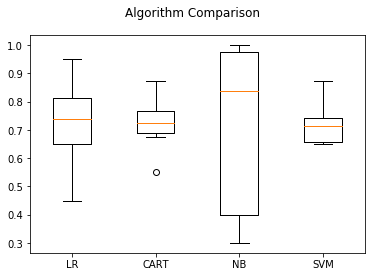

In [5]:
graph = plt.figure()
graph.suptitle('Algorithm Comparison')
ax = graph.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()